### Understand extraction of features using convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

%matplotlib inline

Using TensorFlow backend.


### Initialize Variables

In [2]:
# Load pre-stored MNIST training and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Initialize input and filter value
# Play around with custom image and filter values to understand feature extraction better

image = x_train[0]
kernel = [[2,-1,-1],[-1,2,-1],[-1,-1,2]]

# Custom image value
#image = [[1,0,0,0,0],[1,1,0,0,0],[1,1,1,0,0],[1,1,1,1,0],[1,1,1,1,1]]

In [4]:
# Convert list (if true) to array
image = np.asarray(image)
kernel = np.asarray(kernel)

In [5]:
# Initialzie array to hold convolution output
# Array size depends on size of kernel and image to be convolved

row_img, _ = np.shape(image)
row_ker, _ = np.shape(kernel)

# --------------------------------------

row_conv = row_img - row_ker + 1
conv_op = np.zeros(row_conv * row_conv)

### Function - Convolution

In [6]:
def convolution(conv_op, image, dim):
    
    count=0

    for i in range(dim):

        for j in range(dim):

            conv_op[count] = (image[i][j]*kernel[0][0]) + (image[i][j+1]*kernel[0][1]) + (image[i][j+2]*kernel[0][2])+ \
                (image[i+1][j]*kernel[1][0]) +  (image[i+1][j+1]*kernel[1][1]) + (image[i+1][j+2]*kernel[1][2]) + \
                (image[i+2][j+1]*kernel[2][1]) + (image[i+2][j+1]*kernel[2][1]) + (image[i+2][j+2]*kernel[2][2])

            if conv_op[count] >= 2:
                conv_op[count] = 1
            else:
                conv_op[count] = 0

            count += 1
            
    return conv_op

### Function - Image Visualization

In [7]:
def visualize(image, title, plot):
    
    dim = image.shape[0]
    
    plt.subplot(1, 3, plot)
    plt.xticks([0,dim//2,dim-1])
    plt.yticks([0,dim//2,dim-1])
    plt.axis([0, dim-1, 0, dim-1])

    plt.imshow(image, cmap='gray')
    plt.title(title)
    #plt.gca().invert_yaxis()

### Perform Convolution

In [8]:
conv_op = convolution(conv_op, image, row_conv)
conv_op = np.reshape(conv_op,(row_conv,row_conv))

### Visualize - Convolution

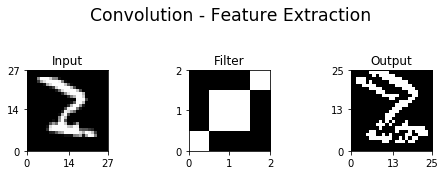

In [9]:
fig = plt.figure(1, figsize=(5,5))
fig.text(0.3, 0.85, "Convolution - Feature Extraction", size = "xx-large")
fig.subplots_adjust(left=0.125, bottom=0.1, right=1.25, top=1.1,\
                    hspace = 2, wspace=1)

# ---------------------------------------------------------------------

visualize(image, "Input", 1)
visualize(kernel, "Filter", 2)
visualize(conv_op, "Output", 3)